# МКР для решения 1D параболического уравнения

Необходимо найти поле температуры $T(x, t)$ в балке длиной $L$ на интервале времени $t \in [0, 1]$. Температура с обоих концов балки известна и поддерживается постояной. Балка изотропна и коэффициент теплопроводности $\lambda=1.$, коэфициент теплоемкости $\rho=1$. В начальный момент времени температура балки $T(x, t)$.

### Формулировка математической модели

\begin{align}
&\rho \frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\left(\lambda \frac{\partial T}{\partial x}\right) + f\\
&T(x, 0) = 0 \\
&T(0, t) = T_1 \\
&T(L, t) = T_2 \\
&f(x, t) = 0
\end{align}

### Численное решение. Явная схема.

1. Построим конечно-разностную пространственную сетку:

<IPython.core.display.Javascript object>


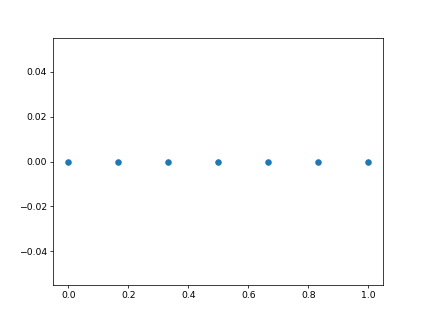

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

n = 7 # количество узлов
L = 1.
h = L/(n - 1) # шаг конечной разности
x_nodes = [i * h for i in range(n)]

fig = plt.figure()
plt.scatter(x_nodes, [0.] * len(x_nodes))

2. Используя конечные разности запишем уравнение для каждого узла:

\begin{align}
\rho \frac{T_i^n - T_i^{n-1}}{\Delta t} = \lambda \frac{T_{i+1}^{n-1} - 2T_{i}^{n-1} + T_{i-1}^{n-1}}{h^2}
\end{align}

Используя матричную форму:

\begin{align}
\rho \frac{\{T\}^{n} - \{T\}^{n-1}}{\Delta t} = [A]\{T\}^{n-1}  + \{f\}
\end{align}

\begin{align}
 \{T\}^{n}  =  \{T\}^{n-1} + \frac{ \Delta t }{\rho} ([A]\{T\}^{n-1} + \{f\})
\end{align}

In [2]:
T_1 = 5.
T_2 = 10.
l = 1.

A = np.zeros((n - 2, n - 2))
f = np.zeros(n - 2)

for i in range(1, n - 1):
    j = i - 1 # индекс неизвестного
    if i == 1:
        A[j][j + 1] = l / h ** 2
        A[j][j] = -2 * l / h **2
        
        f[j] =  l * T_1 / h ** 2
    elif i == n - 2:
        A[j][j] = -2 * l / h **2
        A[j][j - 1] =  l / h ** 2
        
        f[j] = l * T_2 / h ** 2
    else:
        A[j][j + 1] = l / h ** 2
        A[j][j] = -2 * l / h **2
        A[j][j - 1] =  l / h ** 2

In [3]:
t_min, t_max = 0., 1.
delta_t = 0.01
n_time = int((t_max - t_min) / delta_t)
T = np.zeros((n_time, n - 2))
rho = 1.

for time in range(1, n_time):
    T[time, :] = T[time - 1, :] + delta_t/ rho * (f + np.dot(A, T[time - 1, :]))

<IPython.core.display.Javascript object>


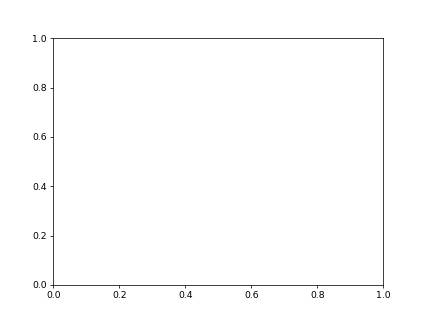

In [4]:
import matplotlib.animation as animation

fig = plt.figure()

def animate(time):
    plt.cla()
    im = plt.plot(x_nodes[1:-1], T[time, :])
    plt.ylim([0, 10])
    return im

ani = animation.FuncAnimation(fig, animate, interval=200, blit=True)

plt.show()

### Численное решение. Неявная схема.

1. Построим конечно-разностную пространственную сетку:


In [5]:
n = 7 # количество узлов
L = 1.
h = L/(n - 1) # шаг конечной разности
x_nodes = [i * h for i in range(n)]

2. Используя конечные разности запишем уравнение для каждого узла:

\begin{align}
\rho \frac{T_i^n - T_i^{n-1}}{\Delta t} = \lambda \frac{T_{i+1}^{n} - 2T_{i}^{n} + T_{i-1}^{n}}{h^2}
\end{align}

Используя матричную форму:

\begin{align}
\rho \frac{\{T\}^{n} - \{T\}^{n-1}}{\Delta t} = [A]\{T\}^{n}  + \{f\}
\end{align}

\begin{align}
 (\frac{\rho}{\Delta t }[I] - [A])\{T\}^{n}  = \frac{\rho}{\Delta t } \{T\}^{n-1}    + \{f\}
\end{align}

\begin{align}
 [M]\{T\}^{n}  = \{b\}
\end{align}

In [6]:
T_1 = 5.
T_2 = 10.
l = 1.

A = np.zeros((n - 2, n - 2))
f = np.zeros(n - 2)

for i in range(1, n - 1):
    j = i - 1 # индекс неизвестного
    if i == 1:
        A[j][j + 1] = l / h ** 2
        A[j][j] = -2 * l / h **2
        
        f[j] =  l * T_1 / h ** 2
    elif i == n - 2:
        A[j][j] = -2 * l / h **2
        A[j][j - 1] =  l / h ** 2
        
        f[j] = l * T_2 / h ** 2
    else:
        A[j][j + 1] = l / h ** 2
        A[j][j] = -2 * l / h **2
        A[j][j - 1] =  l / h ** 2

In [9]:
t_min, t_max = 0., 1.
delta_t = 0.01
n_time = int((t_max - t_min) / delta_t)
T = np.zeros((n_time, n - 2))
rho = 1.

M = rho / delta_t * np.identity(n-2) - A

for time in range(1, n_time):
    b = rho / delta_t * T[time - 1, :] + f
    T[time, :] = np.linalg.solve(M, b)

<IPython.core.display.Javascript object>


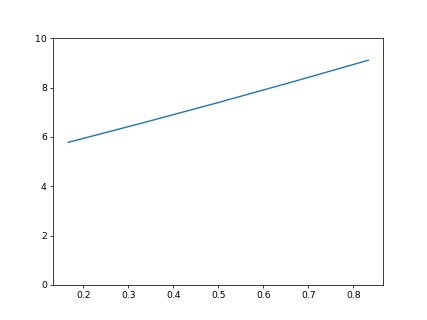

In [10]:
import matplotlib.animation as animation

fig = plt.figure()

def animate(time):
    plt.cla()
    im = plt.plot(x_nodes[1:-1], T[time, :])
    plt.ylim([0, 10])
    return im

ani = animation.FuncAnimation(fig, animate, interval=200, blit=True)

plt.show()

## Упражнения

1. Учесть граничные условия, зависящие от времени:
 
\begin{align}
&T(0, t) = sin(t) \\
&T(L, t) = cos(t) \\
\end{align}

2. Учесть распределенные по длине балки объемные источники тепла:

\begin{align}
f = sin(x) cos(t)
\end{align}